In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19/dataset.xlsx


In [2]:
# Imports
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

In [3]:
# Data Loading
df = pd.read_excel('/kaggle/input/covid19/dataset.xlsx')

In [116]:
df[df['SARS-Cov-2 exam result']=='positive'].head()

Patient age quantile SARS-Cov-2 exam result  \
67                      7               positive   
284                    16               positive   
513                    10               positive   
568                     2               positive   
676                    15               positive   

     Patient addmited to regular ward (1=yes, 0=no)  \
67                                                0   
284                                               1   
513                                               0   
568                                               0   
676                                               0   

     Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                   0       
284                                                  0       
513                                                  0       
568                                                  0       
676                                                  0       

     Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                   0             NaN   
284                                                  0             NaN   
513                                                  0             NaN   
568                                                  0        0.991838   
676                                                  0             NaN   

     Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67          NaN        NaN                    NaN              NaN  ...   
284         NaN        NaN                    NaN              NaN  ...   
513         NaN        NaN                    NaN              NaN  ...   
568    0.792188  -0.341548               1.469188         1.653476  ...   
676         NaN        NaN                    NaN              NaN  ...   

     Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
67                                    NaN                                 NaN   
284                                   NaN                                 NaN   
513                                   NaN                                 NaN   
568                                   NaN                                 NaN   
676                                   NaN                                 NaN   

     Base excess (arterial blood gas analysis)  \
67                                         NaN   
284                                        NaN   
513                                        NaN   
568                                        NaN   
676                                        NaN   

     pH (arterial blood gas analysis)  \
67                                NaN   
284                               NaN   
513                               NaN   
568                               NaN   
676                               NaN   

     Total CO2 (arterial blood gas analysis)  \
67                                       NaN   
284                                      NaN   
513                                      NaN   
568                                      NaN   
676                                      NaN   

     HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
67                                  NaN                                NaN   
284                                 NaN                                NaN   
513                                 NaN                                NaN   
568                                 NaN                                NaN   
676                                 NaN                                NaN   

     Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
67             NaN       NaN                                 NaN  
284            NaN       NaN                                 NaN  
513            NaN       NaN                                 NaN  
568            NaN       NaN   

In [4]:
df.dtypes.head(10)

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
dtype: object

In [5]:
df.index

RangeIndex(start=0, stop=5644, step=1)

In [6]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [7]:
df.count()

Patient ID                                               5644
Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
                                                         ... 
HCO3 (arterial blood gas analysis)                         27
pO2 (arterial blood gas analysis)                          27
Arteiral Fio2                                              20
Phosphor                                                   20
ctO2 (arterial blood gas analysis)                         27
Length: 111, dtype: int64

In [8]:
df = df.drop(columns=['Patient ID'])

### correlation coefficients between variables

In [9]:
df2 = pd.read_excel('/kaggle/input/covid19/dataset.xlsx')
df2.corr()

Patient age quantile  \
Patient age quantile                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   
Patient addmited to intensive care unit (1=yes,...             -0.035772   
Hematocrit                                                      0.096808   
...                                                                  ...   
HCO3 (arterial blood gas analysis)                              0.166245   
pO2 (arterial blood gas analysis)                              -0.098422   
Arteiral Fio2                                                  -0.334562   
Phosphor                                                       -0.511705   
ctO2 (arterial blood gas analysis)                             -0.061265   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.046166   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                       -0.011264   
Patient addmited to intensive care unit (1=yes,...                                       -0.010192   
Hematocrit                                                                               -0.087241   
...                                                                                            ...   
HCO3 (arterial blood gas analysis)                                                       -0.133434   
pO2 (arterial blood gas analysis)                                                         0.105608   
Arteiral Fio2                                                                            -0.173663   
Phosphor                                                                                       NaN   
ctO2 (arterial blood gas analysis)                                                        0.273102   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.015736       
Patient addmited to regular ward (1=yes, 0=no)                                              -0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       
Patient addmited to intensive care unit (1=yes,...                                          -0.008087       
Hematocrit                                                                                  -0.182215       
...                                                                                               ...       
HCO3 (arterial blood gas analysis)                                                          -0.136503       
pO2 (arterial blood gas analysis)                                                           -0.338690       
Arteiral Fio2                                                                               -0.091269       
Phosphor                                                                                     0.185231       
ctO2 (arterial blood gas analysis)                                                          -0.049042       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient age quantile                                                                        -0.035772       
Patient addmited to regular ward (1=yes, 0=no)                                              -0.010192       
Patient addmited to semi-intensive unit (1=yes,...                                          -0.008087       
Patient addmited to intensive care unit (1=yes,...                                           1.000000       
Hematocrit                                                  

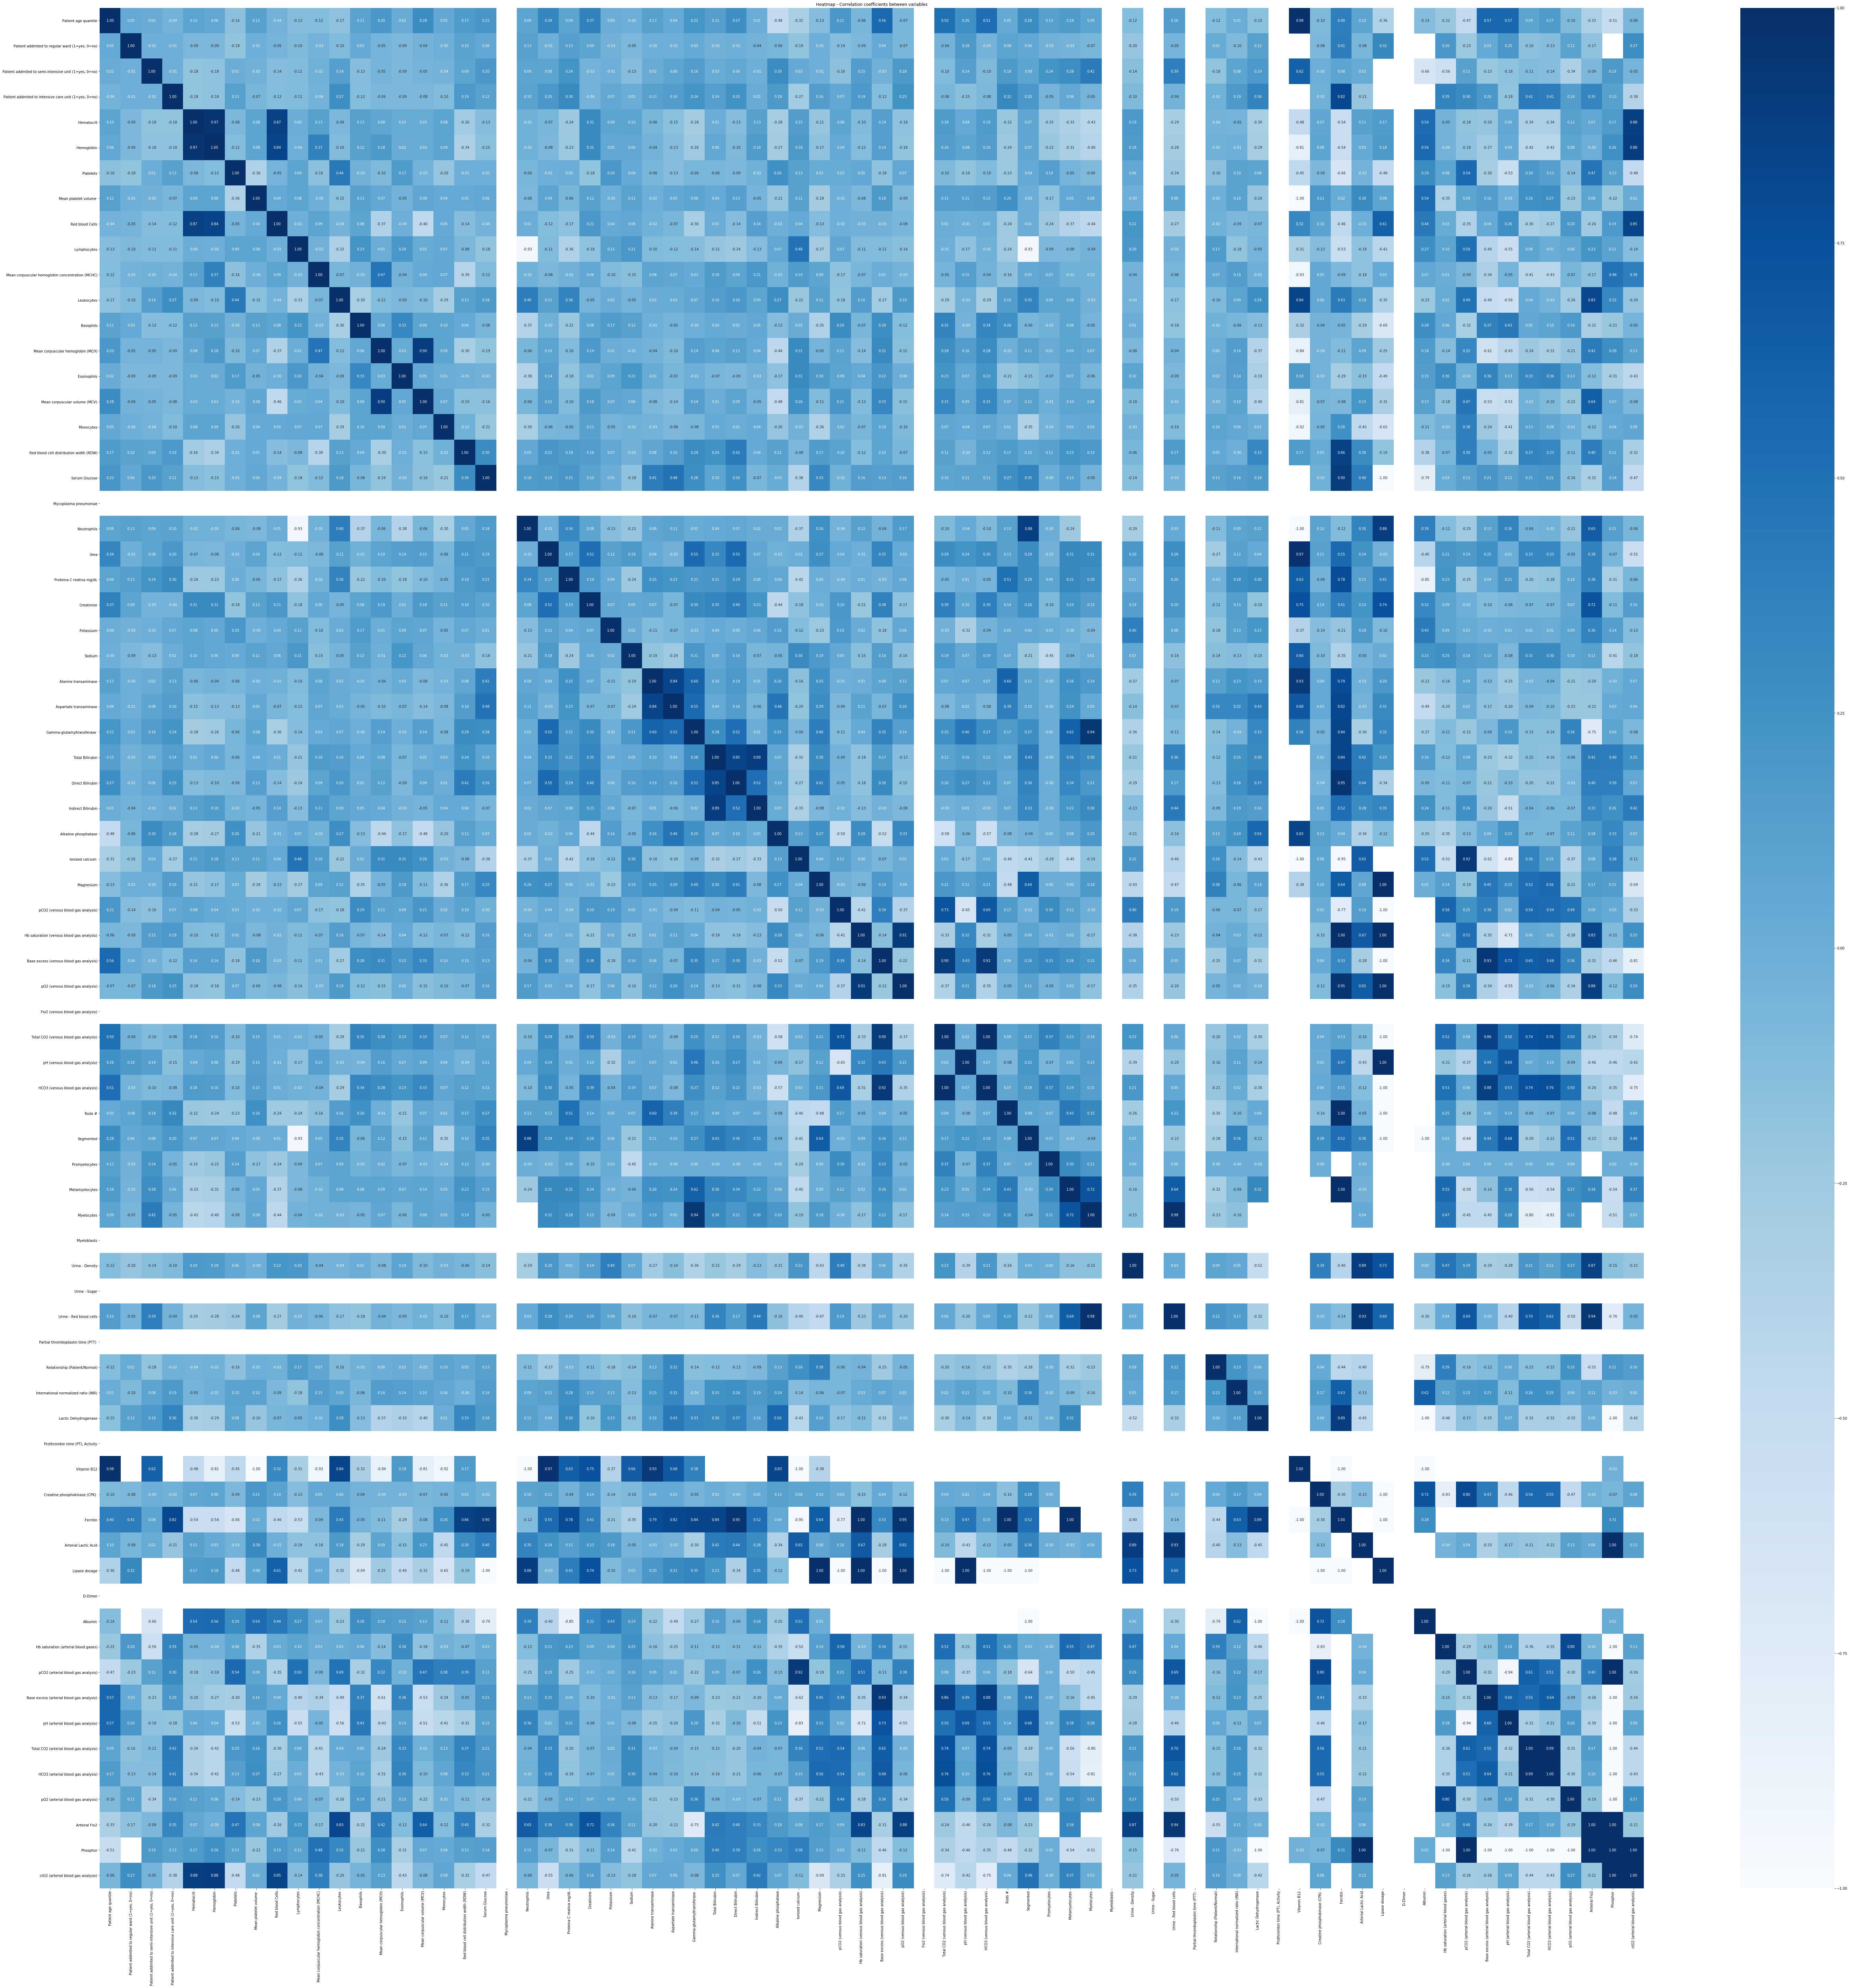

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(100, 100))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Heatmap - Correlation coefficients between variables')
plt.show()

In [11]:
y = pd.get_dummies(df['SARS-Cov-2 exam result'])

In [12]:
full_null_series = (df.isnull().sum() == df.shape[0])
full_null_columns = full_null_series[full_null_series == True].index
# columns with all values equal null
print(full_null_columns.tolist())

['Mycoplasma pneumoniae', 'Urine - Sugar', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity', 'D-Dimer']


In [13]:
df.drop(full_null_columns, axis=1, inplace=True)

In [14]:
y['positive']

0       0
1       0
2       0
3       0
4       0
       ..
5639    1
5640    0
5641    0
5642    0
5643    1
Name: positive, Length: 5644, dtype: uint8

In [15]:
df2 = pd.get_dummies(df.fillna(0))
df2

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
0                       13                                               0   
1                       17                                               0   
2                        8                                               0   
3                        5                                               0   
4                       15                                               0   
...                    ...                                             ...   
5639                     3                                               0   
5640                    17                                               0   
5641                     4                                               0   
5642                    10                                               0   
5643                    19                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0        0.000000   
1                                                     0        0.236515   
2                                                     0        0.000000   
3                                                     0        0.000000   
4                                                     0        0.000000   
...                                                 ...             ...   
5639                                                  0        0.000000   
5640                                                  0        0.000000   
5641                                                  0        0.000000   
5642                                                  0        0.000000   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0       0.000000   0.000000               0.000000         0.000000   
1      -0.022340  -0.517413               0.010677         0.102004   
2       0.000000   0.000000               0.000000         0.000000   
3       0.000000   0.000000               0.000000         0.000000   
4       0.000000   0.000000               0.000000         0.000000   
...          ...        ...                    ...              ...   
5639    0.000000   0.000000               0.000000         0.000000   
5640    0.000000   0.000000               0.000000         0.000000   
5641    0.000000   0.000000               0.000000         0.000000   
5642    0.000000   0.000000               0.000000         0.000000   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  ...  Urine - Hyaline cylinders_absent  \
0        0.000000  ...                                 0   
1        0.318366  ...                                 0   
2        0.000000  ...                                 0   
3        0.000000  ...                                 0   
4        0.000000  ...                                 0   
...           ...  ...                               ...   
5639     0.000000  ...                                 0   
5640     0.000000  ...                                 0   
5641     0.000000 

In [16]:
from sklearn.datasets import make_regression, load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x = df2.loc[:, (df2.columns != 'SARS-Cov-2 exam result_negative') & (df2.columns != 'SARS-Cov-2 exam result_positive') ]
names = df2.columns

# usa a regressão linear como modelo
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=1)
rfe.fit(x, y['positive'])

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [17]:
print("Attributes sorted by rank hair:")
print(sorted(zip(rfe.ranking_, names)))

Attributes sorted by rank hair:
[(1, 'CoronavirusNL63_not_detected'), (2, 'CoronavirusNL63_0'), (3, 'Rhinovirus/Enterovirus_0'), (4, 'Parainfluenza 1_not_detected'), (5, 'Inf A H1N1 2009_0'), (6, 'CoronavirusOC43_not_detected'), (7, 'Bordetella pertussis_0'), (8, 'Inf A H1N1 2009_not_detected'), (9, 'SARS-Cov-2 exam result_positive'), (10, 'Respiratory Syncytial Virus_0'), (11, 'Influenza A_detected'), (12, 'Influenza A, rapid test_negative'), (13, 'Influenza A, rapid test_positive'), (14, 'Strepto A_negative'), (15, 'Strepto A_0'), (16, 'Influenza A, rapid test_0'), (17, 'Influenza B, rapid test_positive'), (18, 'Influenza B, rapid test_negative'), (19, 'Coronavirus229E_detected'), (20, 'Urine - Hemoglobin_absent'), (21, 'Urine - Hemoglobin_present'), (22, 'Urine - pH_Não Realizado'), (23, 'Urine - pH_8.0'), (24, 'Urine - pH_7.5'), (25, 'Parainfluenza 3_detected'), (26, 'Parainfluenza 4_detected'), (27, 'SARS-Cov-2 exam result_negative'), (28, 'Urine - Esterase_not_done'), (29, 'Respi

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns# Carregando dataset
X = df2.loc[:, (df2.columns != 'SARS-Cov-2 exam result_negative') & (df2.columns != 'SARS-Cov-2 exam result_positive') ]
Y = y['positive']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_

array([2.81888894e-01, 5.84726192e-02, 6.01942133e-04, 3.76643694e-03,
       2.13520281e-02, 1.81233728e-02, 2.31246627e-02, 1.17201530e-02,
       2.12790859e-02, 1.26868092e-02, 1.34645218e-02, 5.32930813e-02,
       1.16500818e-02, 1.31576602e-02, 1.82736900e-02, 1.26377153e-02,
       3.10302497e-02, 1.55657149e-02, 7.87636454e-03, 1.62036040e-02,
       1.16414799e-02, 2.07415812e-02, 1.12483876e-02, 8.74024742e-03,
       8.78408498e-03, 8.59236107e-03, 5.63149153e-03, 9.34480684e-03,
       5.95028938e-03, 4.46593654e-03, 5.51296997e-03, 6.32453931e-03,
       6.57660733e-04, 7.95458177e-04, 3.32464428e-03, 2.26808429e-03,
       5.54016115e-03, 1.88085311e-03, 0.00000000e+00, 3.35564161e-03,
       4.02432595e-03, 3.04551477e-03, 1.92560661e-03, 2.18146989e-03,
       1.52369528e-03, 1.27595694e-03, 2.87616246e-03, 0.00000000e+00,
       1.93258805e-03, 1.59856720e-03, 4.78749670e-03, 2.81957934e-03,
       9.11619884e-03, 6.40982070e-05, 4.03744699e-03, 7.32622662e-04,
      

Text(0.5, 1.0, 'Importância de cada feature')

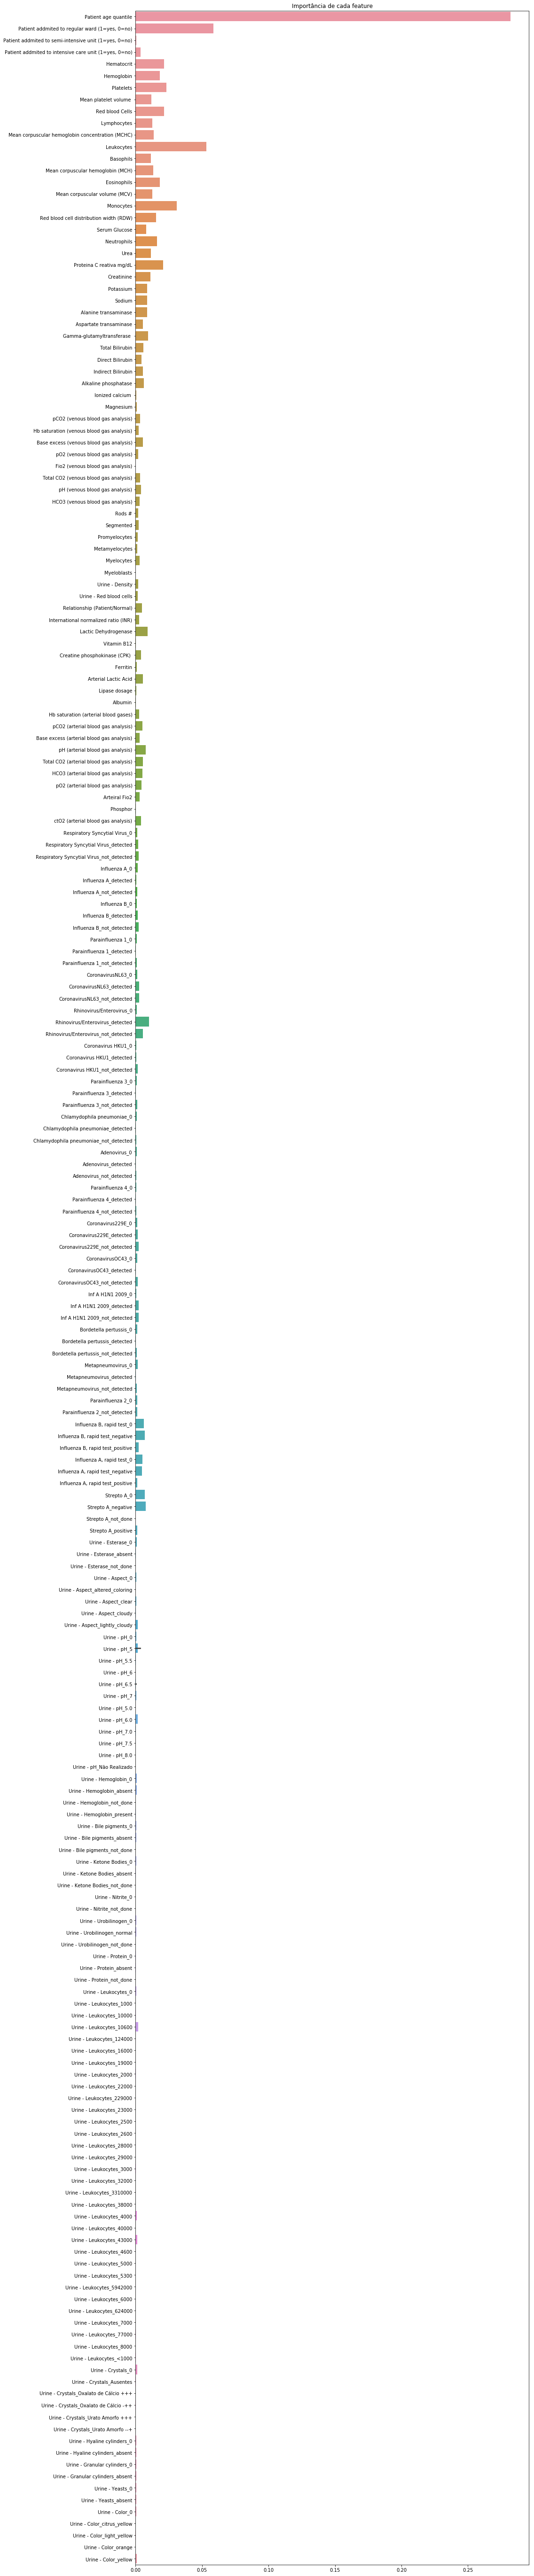

In [19]:
plt.figure(figsize=(15,100))
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif, mutual_info_regression

In [163]:
X = df2.loc[:, (df2.columns != 'SARS-Cov-2 exam result_negative') & (df2.columns != 'SARS-Cov-2 exam result_positive') ]
Y = y['positive']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
mi = mutual_info_classif(X_train, y_train)

In [48]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi = mi.sort_values(ascending=True)

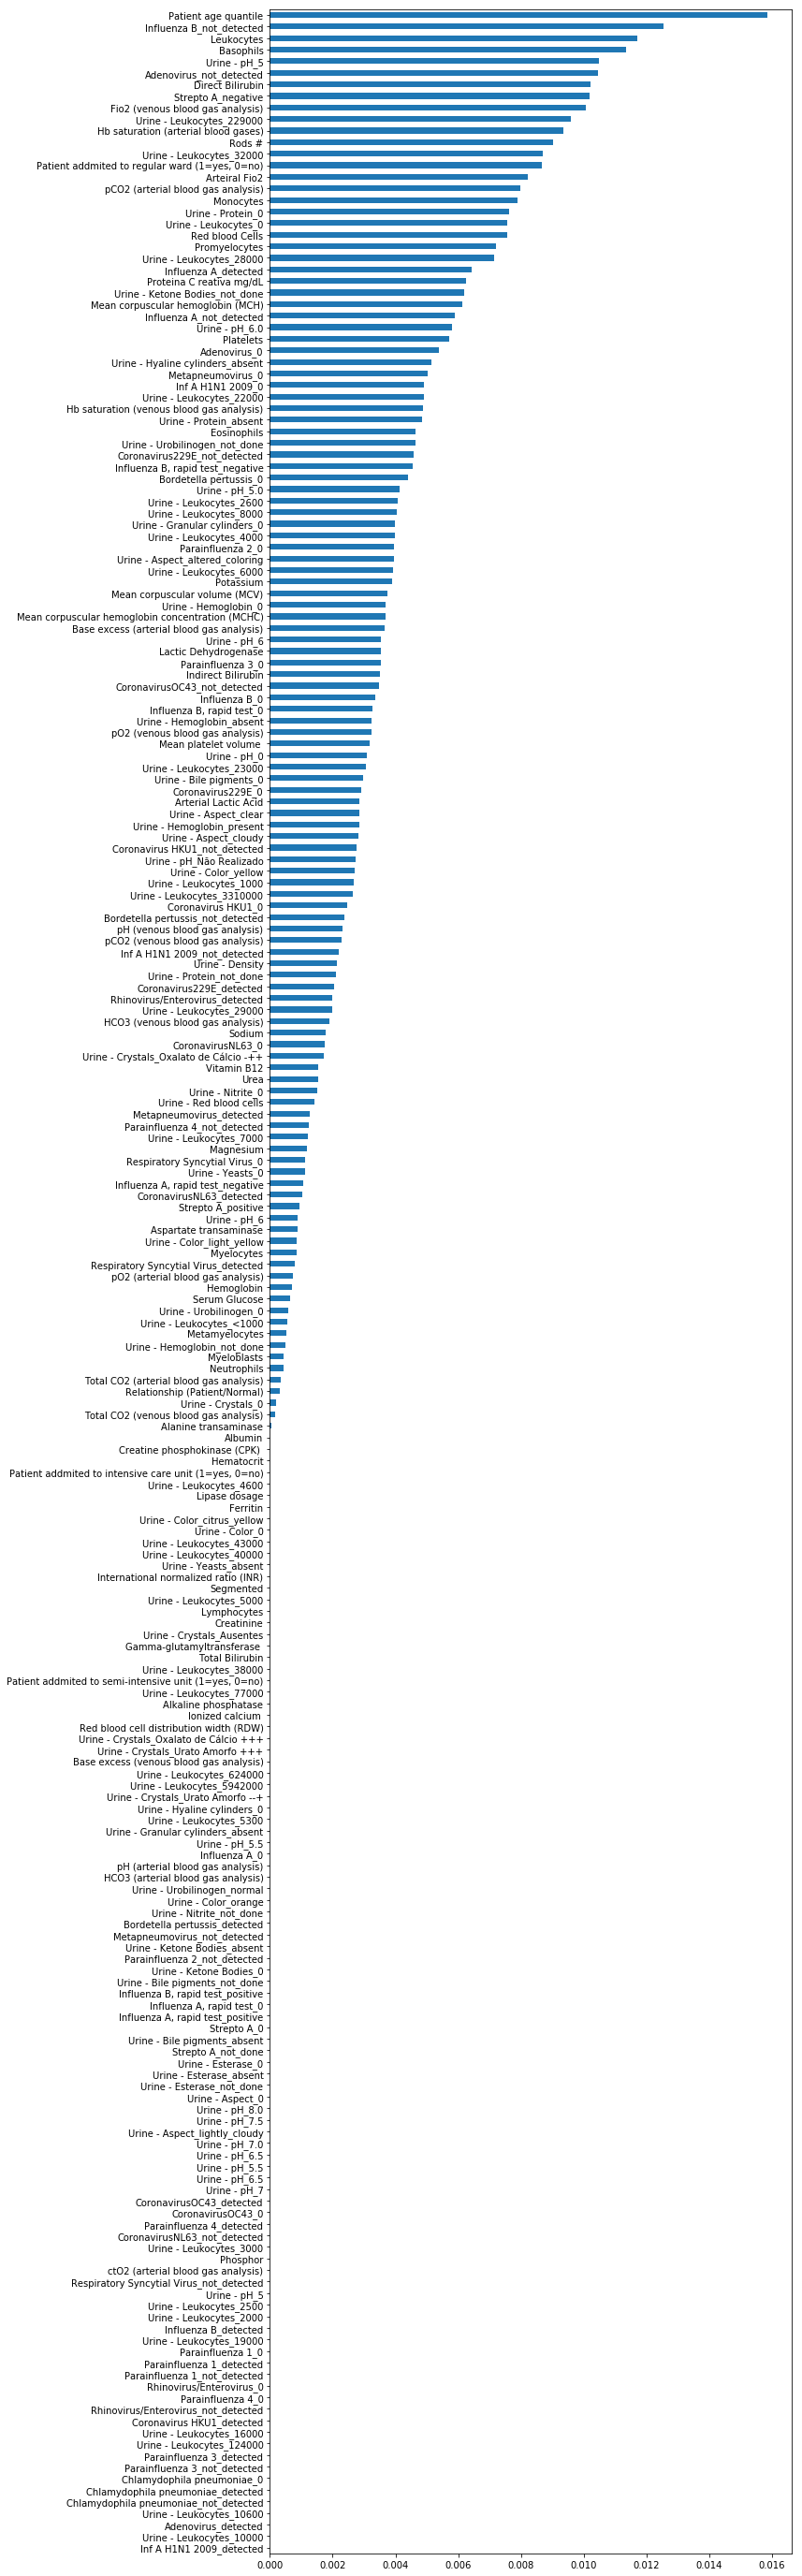

In [49]:
mi.plot.barh(figsize=(10,50))

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def models(X_train, Y_train, X_test, Y_test):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    log_pred = log.predict(X_test)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    knn_pred = knn.predict(X_test)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    svc_lin_pred = svc_lin.predict(X_test)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    svc_rbf_pred = svc_rbf.predict(X_test)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    gauss_pred = gauss.predict(X_test)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit (X_train, Y_train)
    tree_pred = tree.predict(X_test)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    forest_pred = forest.predict(X_test)
    
    from sklearn.linear_model import Perceptron
    pcp = Perceptron(random_state = 0)
    pcp.fit(X_train, Y_train)
    pcp_pred = pcp.predict(X_test)
    
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[0]Logistic Regression Testing Accuracy: ', accuracy_score(Y_test, log_pred))
    print(classification_report(Y_test, log_pred))
    
    print('[1]KNeighborns Training Accuracy: ', knn.score(X_train, Y_train))
    print('[1]KNeighborns Testing Accuracy: ', accuracy_score(Y_test, knn_pred))
    print(classification_report(Y_test, knn_pred))
    
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[2]SVC Linear Testing Accuracy: ', accuracy_score(Y_test, svc_lin_pred))
    print(classification_report(Y_test, svc_lin_pred))
    
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[3]SVC RBF Testing Accuracy: ', accuracy_score(Y_test, svc_rbf_pred))
    print(classification_report(Y_test, svc_rbf_pred))
    
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[4]Gaussian NB Testing Accuracy: ', accuracy_score(Y_test, gauss_pred))
    print(classification_report(Y_test, gauss_pred))
    
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[5]Decision Tree Testing Accuracy: ', accuracy_score(Y_test, tree_pred))
    print(classification_report(Y_test, tree_pred))
    
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    print('[6]Random Forest Testing Accuracy: ', accuracy_score(Y_test, forest_pred))
    print(classification_report(Y_test, forest_pred))
    
    print('[7] Perceptron Training Accuracy: ', pcp.score(X_train, Y_train))
    print("[7] Perceptron Testing accuracy: ", accuracy_score(Y_test, pcp_pred))
    print(classification_report(Y_test, pcp_pred))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, pcp

In [125]:
mod = models(X_train,y_train, X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0]Logistic Regression Training Accuracy:  0.9062130876446964
[0]Logistic Regression Testing Accuracy:  0.9170800850460666
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1280
           1       1.00      0.11      0.19       131

    accuracy                           0.92      1411
   macro avg       0.96      0.55      0.57      1411
weighted avg       0.92      0.92      0.89      1411

[1]KNeighborns Training Accuracy:  0.9003071107961257
[1]KNeighborns Testing Accuracy:  0.9085754783841248
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1280
           1       1.00      0.02      0.03       131

    accuracy                           0.91      1411
   macro avg       0.95      0.51      0.49      1411
weighted avg       0.92      0.91      0.87      1411

[2]SVC Linear Training Accuracy:  0.9062130876446964
[2]SVC Linear Testing Accuracy:  0.9149539333805812
           

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
predict_fn = lambda x: mod[0].predict_proba(x).astype(float)

In [171]:
df[df.index == 3462]

Patient age quantile SARS-Cov-2 exam result  \
3462                     8               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
3462                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
3462                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
3462                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
3462         NaN        NaN                    NaN              NaN  ...   

      Hb saturation (arterial blood gases)  \
3462                                   NaN   

      pCO2 (arterial blood gas analysis)  \
3462                                 NaN   

      Base excess (arterial blood gas analysis)  \
3462                                        NaN   

      pH (arterial blood gas analysis)  \
3462                               NaN   

      Total CO2 (arterial blood gas analysis)  \
3462                                      NaN   

      HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
3462                                 NaN                                NaN   

      Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
3462            NaN       NaN                                 NaN  

[1 rows x 105 columns]

In [177]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,                                            
                 feature_names=X_train.columns.values.tolist(),                                        
                 class_names=y_train.unique())

np.random.seed(42)
exp = explainer.explain_instance(X_test.values[465], predict_fn, num_features = 8)
exp.show_in_notebook(show_all=True) #only the features used in the explanation are displayed

exp = explainer.explain_instance(X_test.values[2], predict_fn, num_features = 8)
exp.show_in_notebook(show_all=True)